<a href="https://colab.research.google.com/drive/1TPlDVlWCwfXB0lbTJLNnHCoFwIjVgoNH?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem 1

Let $f(x) = 2\sin x - \cos{2x}$. Write a function `beauty_derivative_plot` that takes a point $x$ and plots the function $f(x)$ and its derivative $f'(x)$ in the range $x \in [-2\pi, 2\pi]$. The function should also plot the tangent line to the function at the point $x$.

Example of output for $x = -3, -2, 1.7$:

```python
beauty_derivative_plot(-3)
```
<img src="https://i.ibb.co/W4pyPfTX/tangent-line-3-0.png" width="600"/>

```python
beauty_derivative_plot(-2)
```
<img src="https://i.ibb.co/F4zDq8m0/tangent-line-2-0.png" width="600"/>

```python
beauty_derivative_plot(1.7)
```
<img src="https://i.ibb.co/TBmLXg2h/tangent-line-1-7.png" width="600"/>

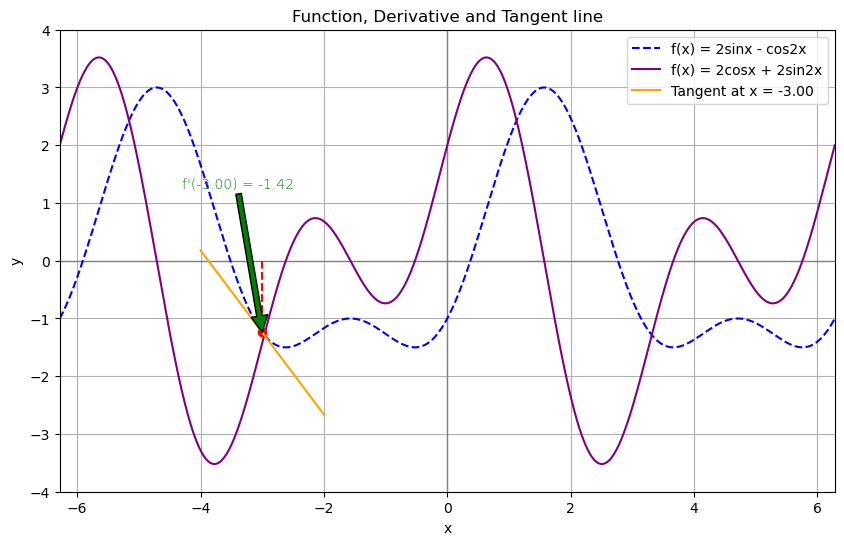

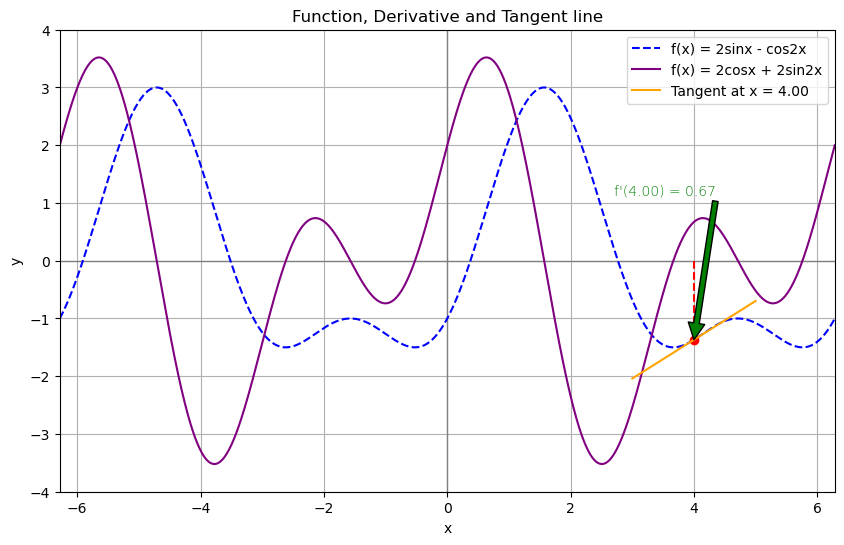

In [42]:
def beauty_derivative_plot(x):
    import matplotlib.pyplot as plt
    import numpy as np
    
    z = np.linspace(-2*np.pi, 2*np.pi, 1000)
    z1 = np.linspace(x-1, x+1, 100)
    y = 2*np.sin(z) - np.cos(2*z)
    g = 2*np.cos(z) + 2*np.sin(2*z)
    plt.figure(figsize=(10,6))
    
    plt.axhline(0, color='gray', linewidth=1)  
    plt.axvline(0, color='gray', linewidth=1) 
    
    plt.plot(z, y, "b--", label="f(x) = 2sinx - cos2x")
    plt.plot(z, g, color="purple", label="f(x) = 2cosx + 2sin2x")
    
    px = x
    py = 2*np.sin(x) - np.cos(2*x)
    plt.plot(px, py, "ro") 
    

    plt.plot([px, px], [0, py], 'r--')  
    plt.plot([0, px], [py, py], 'r--') 
    

    def g(k):
        return 2*np.cos(k) + 2*np.sin(2*k)
    
    def y(k):
        return 2*np.sin(k) - np.cos(2*k)
    
    y1 = g(x)
    
   
    plt.annotate(f"f'({x:.2f}) = {y1:.2f}", xy=(px, py), xytext=(px-1.3, py+2.5),
                 color="green", fontsize=10, weight="light",
                 arrowprops={"facecolor": "green"})
    
    
    t = y1 * (z1 - x) + y(x)
    plt.plot(z1, t, "orange", label="Tangent at x = %0.2f" % x)
    
    plt.legend(loc="best")
    plt.title('Function, Derivative and Tangent line')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.axis([-2*np.pi, 2*np.pi, -4, 4])
    plt.show()


beauty_derivative_plot(-3)
beauty_derivative_plot(4)

## Problem 2

The data in [populations.txt](https://drive.google.com/file/d/1Bq7qVzbZIOd058VobGE6iYjUcMFkbZMt/view?usp=drive_link) describes the populations of hares, lynxes and carrots in northern Canada during 20 years. Do the following exercises **without for-loops**.

- Plot the population size of each species for each year on a single graph. Add legend and axis labels to the plot.

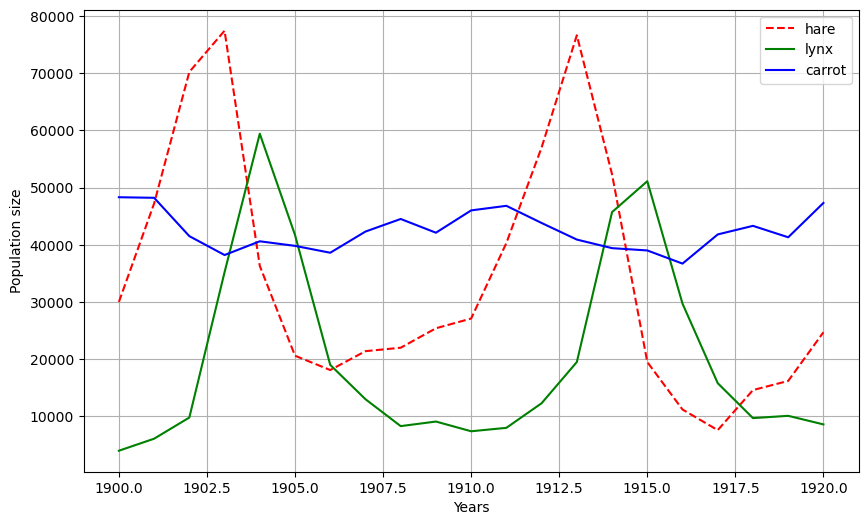

In [104]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('populations.txt')

year=data[:,0]
hare=data[:,1]
lynx=data[:,2]
carrot=data[:,3]
plt.figure(figsize=(10,6))
plt.plot(year, hare,"r--",label="hare")
plt.plot(year, lynx, color="green",label="lynx")
plt.plot(year, carrot, color="blue",label="carrot")
plt.grid(True)
plt.legend(loc="best")
plt.xlabel('Years')
plt.ylabel('Population size')
plt.show()

- Find which year each species had the largest population. Mark these years in the plot of populations.

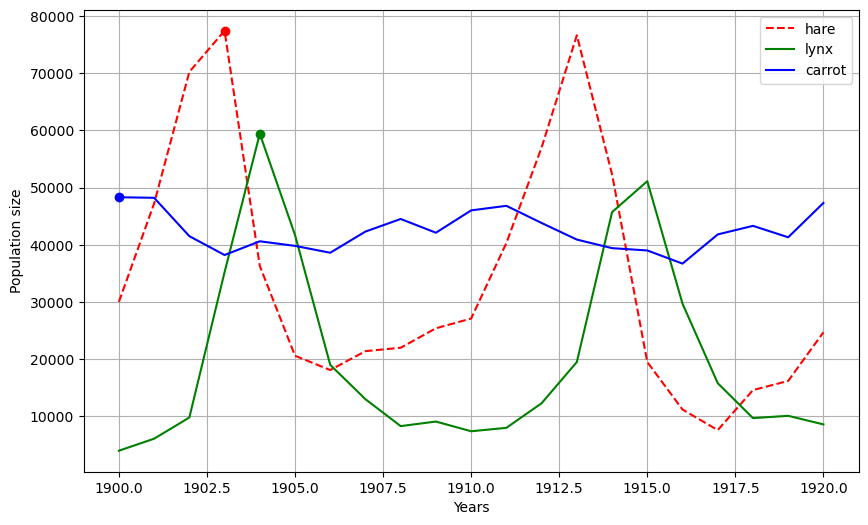

In [170]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('populations.txt')

year=data[:,0]
hare=data[:,1]
lynx=data[:,2]
carrot=data[:,3]



plt.figure(figsize=(10,6))
plt.plot(year, hare,"r--",label="hare")
plt.plot(year, lynx, color="green",label="lynx")
plt.plot(year, carrot, color="blue",label="carrot")
plt.grid(True)
plt.legend(loc="best")
plt.xlabel('Years')
plt.ylabel('Population size')

hmax=hare.max()
arghmax=np.argmax(hare)
lmax=lynx.max()
arglmax=np.argmax(lynx)
cmax=carrot.max()
argcmax=np.argmax(carrot)
plt.plot(year[arghmax], hmax, "ro")
plt.plot(year[arglmax], lmax, "go")
plt.plot(year[argcmax], cmax, "bo")

plt.show()



- Assuming total population of hares and lynxes is 100%, plot stacked bar graph showing ratio of each specis for each year in the period.

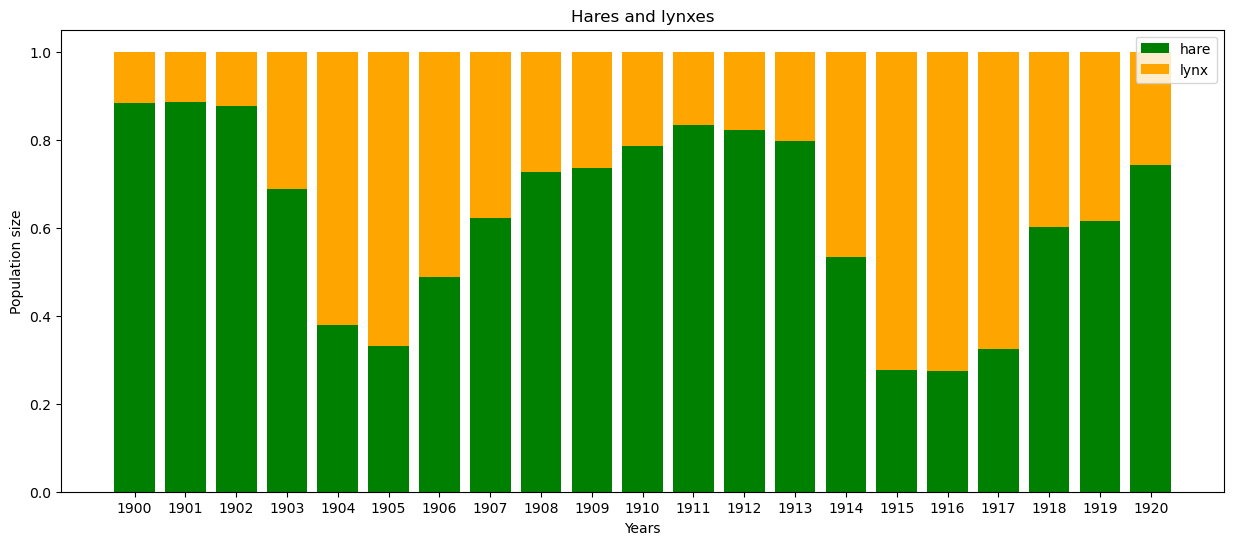

In [40]:

import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('populations.txt')

year=data[:,0]
hare=data[:,1]
lynx=data[:,2]

harelynx=hare+lynx
lenhare=hare/harelynx
lenlynx=lynx/harelynx

x = np.arange(len(year))
plt.figure(figsize=(15,6))

plt.bar(year, lenhare, label='hare', color='green')
plt.bar(year, lenlynx, bottom=lenhare, label='lynx', color='orange')


plt.xticks(year)
plt.xlabel('Years')
plt.ylabel('Population size')
plt.title('Hares and lynxes')
plt.legend()

plt.show()

- Find the mean and std of the populations of each species. Plot the historgam of population for each species and show mean values with vertical line. Show each histogram in a separate plot. Arrange 3 plots in a row.

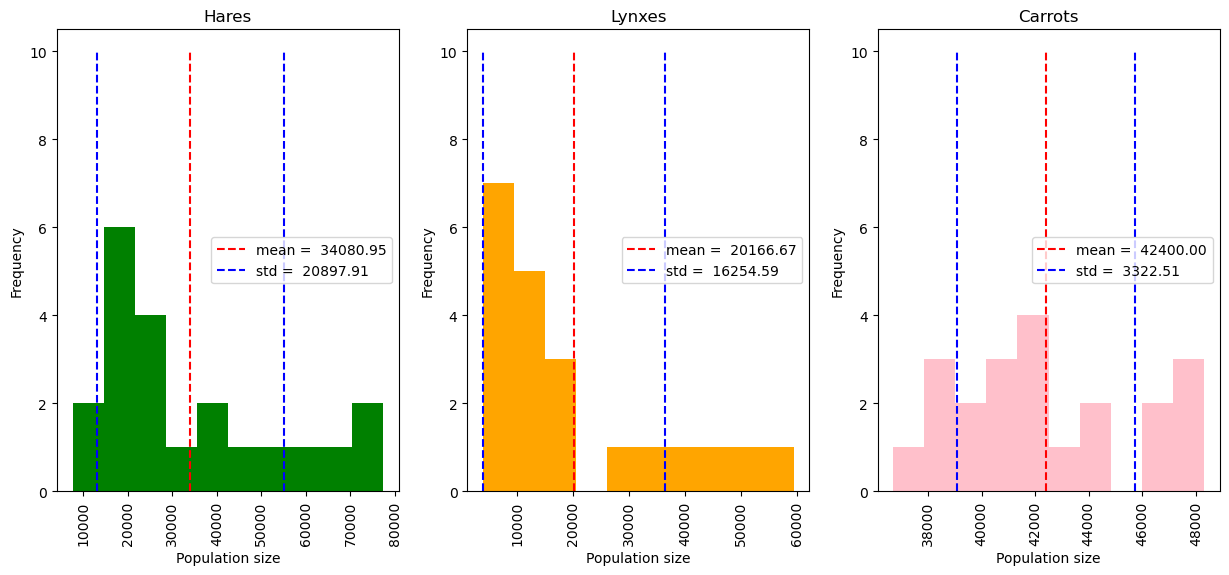

In [114]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('populations.txt')

year=data[:,0]
hare=data[:,1]
lynx=data[:,2]
carrot=data[:,3]

plt.figure(figsize=(15,6))
plt.subplot(1, 3, 1)
plt.xticks(rotation=90)
plt.hist(hare, bins=10, color='green')
x=hare.mean()
plt.plot([hare.mean(), hare.mean()], [0, 10], 'r--', label="mean =  %0.2f" % hare.mean() )
plt.plot([hare.mean()-hare.std(), hare.mean()-hare.std()], [0, 10], 'b--', label="std =  %0.2f" % hare.std() )
plt.plot([hare.mean()+hare.std(), hare.mean()+hare.std()], [0, 10], 'b--')
plt.xlabel('Population size')
plt.ylabel('Frequency')
plt.title('Hares')
plt.legend(loc="best")

plt.subplot(1, 3, 2)
plt.xticks(rotation=90)
plt.hist(lynx, bins=10, color='orange')
plt.plot([lynx.mean(), lynx.mean()], [0, 10], 'r--', label="mean =  %0.2f" % lynx.mean())
plt.plot([lynx.mean()-lynx.std(), lynx.mean()-lynx.std()], [0, 10], 'b--',  label="std =  %0.2f" % lynx.std())
plt.plot([lynx.mean()+lynx.std(), lynx.mean()+lynx.std()], [0, 10], 'b--')
plt.xlabel('Population size')
plt.ylabel('Frequency')
plt.title('Lynxes')
plt.legend(loc="best")

plt.subplot(1, 3, 3)
plt.xticks(rotation=90)
plt.hist(carrot, bins=10, color='pink')
plt.plot([carrot.mean(), carrot.mean()], [0, 10], 'r--',  label="mean =  %0.2f" % carrot.mean() )
plt.plot([carrot.mean()-carrot.std(), carrot.mean()-carrot.std()], [0, 10], 'b--',  label="std =  %0.2f" % carrot.std())
plt.plot([carrot.mean()+carrot.std(), carrot.mean()+carrot.std()], [0, 10], 'b--')
plt.xlabel('Population size')
plt.ylabel('Frequency')
plt.title('Carrots')
plt.legend(loc="best")

plt.show()

- Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...]. Plot a pie chart showing the ratio of "H" and "L" values.

['H' 'H' 'H' 'H' 'L' 'L' 'L' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'L' 'L' 'L'
 'H' 'H' 'H']


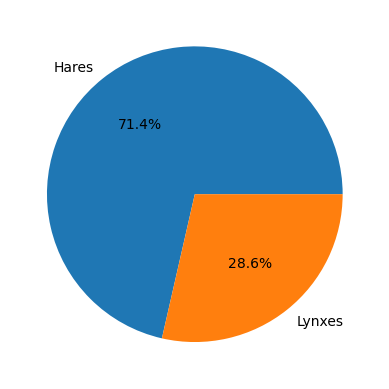

In [168]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('populations.txt')

hare = data[:,1]
lynx = data[:,2]

difference = hare-lynx

mask1 = (difference>0)
mask2 = (difference<0)

result = np.empty(mask.shape, dtype='<U1')
result[mask1]='H'
result[mask2]='L'
print(result)

plt.pie([mask1.sum(), mask2.sum()], labels=['Hares','Lynxes'], autopct='%1.1f%%')
plt.show()

- Plot the change in the hare population and in the lynx population for each year. Find the correlation coefficient between the both time series.

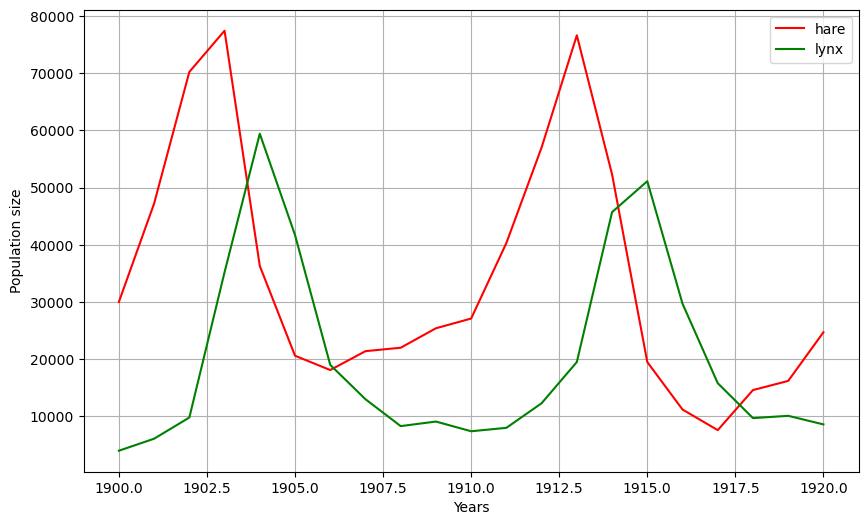

correlation =  0.07189206073535569


In [190]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('populations.txt')

year=data[:,0]
hare=data[:,1]
lynx=data[:,2]
plt.figure(figsize=(10,6))
plt.plot(year, hare,"r",label="hare")
plt.plot(year, lynx, color="green",label="lynx")
plt.grid(True)
plt.legend(loc="best")
plt.xlabel('Years')
plt.ylabel('Population size')

plt.show()

correlation = ((hare - hare.mean())*(lynx - lynx.mean())).mean()/(hare.std()*lynx.std())
print("correlation = ", correlation)

- Using a scatter plot, show the population of hares vs lynxes by year (each point corresponds to a particular year, and the point coordinates correspond to the population of the two species in that year).

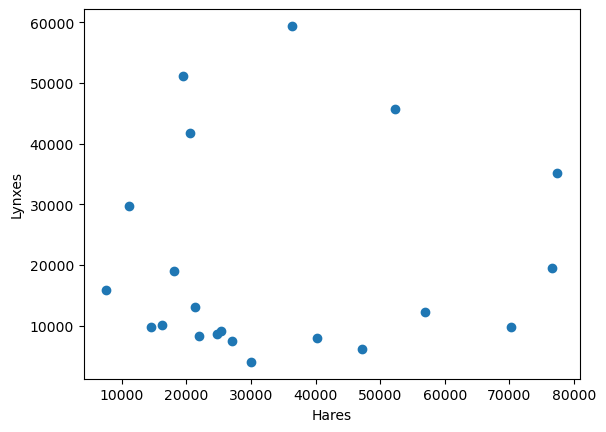

In [194]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('populations.txt')

year=data[:,0]
hare=data[:,1]
lynx=data[:,2]

plt.xlabel('Hares')
plt.ylabel('Lynxes')

plt.scatter(hare, lynx)
plt.show()


- Assume the population of hares in 1920 is unknown. Suggest a way to estimate this value. Compare an estimated value
with the true value and print a ratio of the error to the true value.

In [201]:
import numpy as np

data = np.loadtxt('populations.txt')
hare=data[:,1]

hare1919=hare[:-1]

print((abs(hare[-1]-hare1919.mean()))/hare[-1])



0.39878542510121456
